# "Distinguish Your Own Digits "
> "Implementing a classifier that distinguishes between the number 3 and number 8"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jagriti Goswami
- categories: [fastpages, jupyter]

In [1]:
#hide

%load_ext autoreload
%autoreload 2

In [2]:
#hide

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#hide

!pip install mnist

## Preparing the Data

In [4]:
#hide
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
#hide

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
#hide

test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

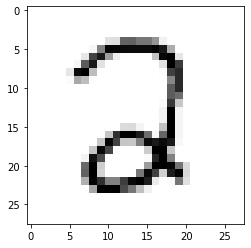

In [9]:
image_index = 7776 
plt.imshow(train_images[image_index], cmap='Greys');

## Filtering data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

Setting up the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
#hide

X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [16]:
#hide

from kudzu.data import Data, Sampler, Dataloader
from kudzu.callbacks import Callback, ClfCallback
from kudzu.loss import BCE
from kudzu.layer import Affine, Relu, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner

In [17]:
data = Data(X_train, y_train)
loss = BCE() #Binary Cross Entropy Loss function

#### Initialisations

In [18]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50

In [19]:
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

#### Putting the layers together

In [20]:
layers = [Affine("first", 784, 100), Relu("relu"), Affine("second", 100, 100), Relu("relu"), Affine("third", 100, 2), Affine("final", 2, 1),Sigmoid("sigmoid")]
model = Model(layers)

## Training the model

#### Neural Network Implementation

In [21]:
learner = Learner(loss, model, opt, config.num_epochs)
acc = ClfCallback(learner, config.bs, X_train, y_train, X_test, y_test)
learner.set_callbacks([acc])

In [22]:
#collapse-hide
learner.train_loop(dl)

Epoch 0 Loss 0.7169876739277562
Train Accuracy 0.6927891837756635
Test Accuracy 0.7016129032258065
------------
Epoch 10 Loss 0.16232891186711848
Train Accuracy 0.9490903021198465
Test Accuracy 0.9566532258064516
------------
Epoch 20 Loss 0.11876008805896657
Train Accuracy 0.9609414121181773
Test Accuracy 0.9657258064516129
------------
Epoch 30 Loss 0.104595749451395
Train Accuracy 0.9664496745117677
Test Accuracy 0.967741935483871
------------
Epoch 40 Loss 0.09612489288245284
Train Accuracy 0.9697880153563679
Test Accuracy 0.967741935483871
------------
Epoch 50 Loss 0.08971443968585345
Train Accuracy 0.972375229510933
Test Accuracy 0.9707661290322581
------------
Epoch 60 Loss 0.0843235473745234
Train Accuracy 0.9747955266232682
Test Accuracy 0.9702620967741935
------------
Epoch 70 Loss 0.07935163335812181
Train Accuracy 0.9765481555666834
Test Accuracy 0.9712701612903226
------------
Epoch 80 Loss 0.074853267669832
Train Accuracy 0.9776331163411784
Test Accuracy 0.97227822580645

0.005344937027161078

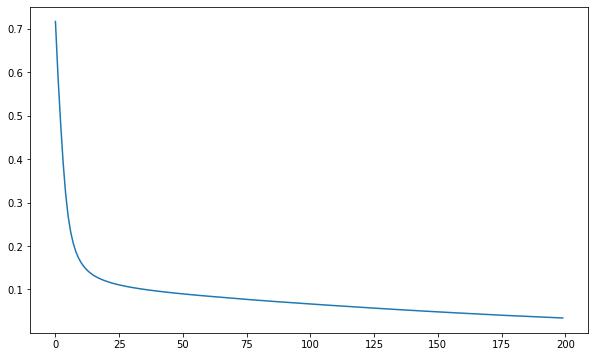

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(acc.losses);

#### Logistic Regression Implementation

In [24]:
LR_layers = [Affine("logits", 784, 1), Sigmoid("sigmoid")];

In [25]:
LR_model = Model(LR_layers)

In [26]:
LR_learner = Learner(loss, LR_model, opt, config.num_epochs)
LR_acc = ClfCallback(LR_learner, config.bs, X_train, y_train, X_test, y_test)
LR_learner.set_callbacks([LR_acc])

In [27]:
#collapse-hide
LR_learner.train_loop(dl) 

Epoch 0 Loss 0.6147401779566041
Train Accuracy 0.8131363712235019
Test Accuracy 0.8351814516129032
------------
Epoch 10 Loss 0.26909021507194664
Train Accuracy 0.9236354531797697
Test Accuracy 0.9425403225806451
------------
Epoch 20 Loss 0.2134287257532239
Train Accuracy 0.9371557336004006
Test Accuracy 0.9526209677419355
------------
Epoch 30 Loss 0.18764458602617093
Train Accuracy 0.9441662493740611
Test Accuracy 0.9561491935483871
------------
Epoch 40 Loss 0.17222865151190273
Train Accuracy 0.9487564680353864
Test Accuracy 0.9611895161290323
------------
Epoch 50 Loss 0.16180949036092554
Train Accuracy 0.9524286429644466
Test Accuracy 0.9616935483870968
------------
Epoch 60 Loss 0.15420904941416055
Train Accuracy 0.9540978133867468
Test Accuracy 0.9621975806451613
------------
Epoch 70 Loss 0.1483754473003919
Train Accuracy 0.9553496912034719
Test Accuracy 0.9621975806451613
------------
Epoch 80 Loss 0.14373290387047613
Train Accuracy 0.956685027541312
Test Accuracy 0.962197580

0.10168384988941818

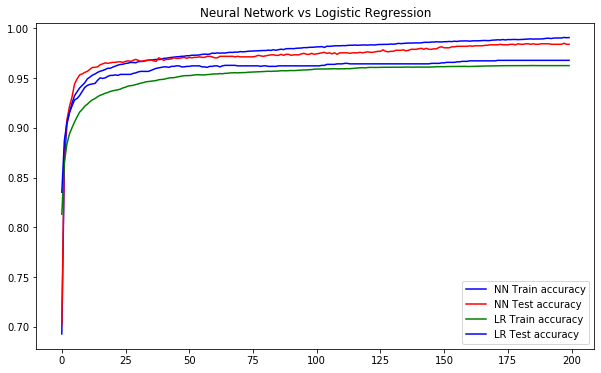

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(acc.accuracies,'b-', label = "NN Train accuracy")
plt.plot(acc.test_accuracies,'r-', label = "NN Test accuracy")
plt.plot(LR_acc.accuracies,'g-', label = "LR Train accuracy")
plt.plot(LR_acc.test_accuracies,'b-', label = "LR Test accuracy")
plt.title("Neural Network vs Logistic Regression")
plt.legend();

It can be seen from the above figure that while for the Neural Network model is already overfitting, the validation accuracy has dipped below the training accuracy and they are diverging, its not the case for Linear Regression

## Confusion Matrix

In [29]:
probs = model(X_test)
predictions = 1*(probs >= 0.5)

In [30]:
#hide

from sklearn.metrics import confusion_matrix

In [31]:
c_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix: {c_matrix}")
print(f"False positive: {c_matrix[0][1]}")
print(f"False negative: {c_matrix[1][0]}")
m_classify = c_matrix[0][1] + c_matrix[1][0]
print(f"Number of misclassifications: {m_classify}")

Confusion Matrix: [[958  16]
 [ 16 994]]
False positive: 16
False negative: 16
Number of misclassifications: 32


Our accuracy is quite high!! 

## Plotting data in the embedding space

In [32]:
def get_embedding(input):
    upto_embed = model.layers[:-2]
    for l in upto_embed:
        input = l(input)
    return input

In [33]:
ES = get_embedding(X_test)

In [34]:
#hide

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [35]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

In [36]:
xgrid = np.linspace(-10,10,100)
ygrid = np.linspace(-10,10,100)
xx, yy = np.meshgrid(xgrid,ygrid)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

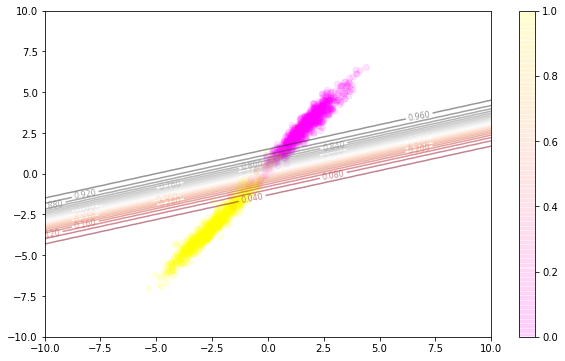

In [37]:
plt.figure(figsize=(10, 6))
contour = plt.contour(xx, yy, probs, 25,vmin=0, vmax=1, alpha=0.5, cmap = "RdGy")
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(ES[:,0], ES[:,1], c = y_test.ravel(), cmap = "spring", alpha=0.1)
plt.colorbar();

## Actual vs Prediction

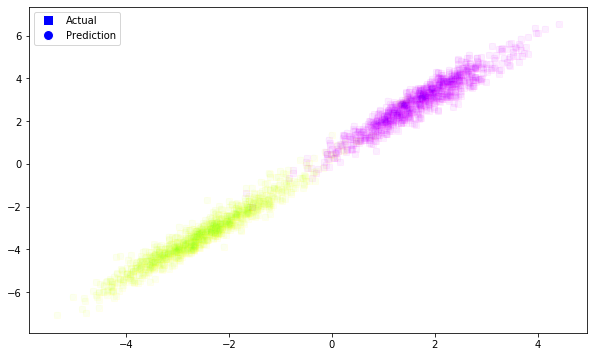

In [38]:
from matplotlib.lines import Line2D
plt.figure(figsize=(10, 6))
plt.scatter(ES[:,0], ES[:,1], c = y_test.ravel(), marker = "s", cmap = "spring", alpha=0.05)
plt.scatter(ES[:,0], ES[:,1], c = predictions.ravel(),marker = "o", cmap = "winter", alpha=0.01)
legend_elements = [Line2D([0], [0], marker='s', color='w', label='Actual',markerfacecolor='b', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Prediction',markerfacecolor='b', markersize=10)]
plt.legend(handles=legend_elements);